# eda.ipynb file for EGT 309 Project

Public Dataset Link: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

Credits:

Richie:
- Completed 1.1 to 1.6 (Inspected file 1 to file 6.)
- Completed 2.1, 2.2 data cleaning for file 5.
- Completed 4 and 5

Xiu Wen:
- Created format for EDA file (sections, titles, markdown positions)
- Completed 1.7 to 1.9 (Inspected file 7 to file 9.)
- Completed 2.3 data cleaning for file 7.
- Completed 3 data merging.
- Written markdown comments for section 2 and section 3.

## 1. Data Loading and Initial Inspection

In [1]:

# Import Libraries.
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import plotly.express as px
# import matplotlib.pyplot as plt           commented out to avoid import errors on vsc first 
# import seaborn as sns

In [2]:
# Note: We did not read the data_dictionary as it is not a dataset to be used. Viewed it externally on Excel instead.

customers_dataset = pd.read_csv('data/01_raw/olist_customers_dataset.csv')
geolocation_dataset = pd.read_csv('data/01_raw/olist_geolocation_dataset.csv')
order_items_dataset = pd.read_csv('data/01_raw/olist_order_items_dataset.csv')
order_payments_dataset = pd.read_csv('data/01_raw/olist_order_payments_dataset.csv')
order_reviews_dataset = pd.read_csv('data/01_raw/olist_order_reviews_dataset.csv')
orders_dataset = pd.read_csv('data/01_raw/olist_orders_dataset.csv')
products_dataset = pd.read_csv('data/01_raw/olist_products_dataset.csv')
sellers_dataset = pd.read_csv('data/01_raw/olist_sellers_dataset.csv')
product_category_name_translation_dataset = pd.read_csv('data/01_raw/product_category_name_translation.csv')
# new_master_dataset = pd.read_csv('data/master_dataset_updated.csv')

### 1.1 Inspect customers_dataset

In [3]:
customers_dataset

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0                         14409                 franca             SP  
1                          9790  sao bernardo do campo             SP  
2                          1151              sao paulo             SP  
3                          8775        mogi das cruzes             SP  
4                         13056               campinas             SP  
...                         ...                    ...            ...  
99436                      3937              sao paulo             SP  
99437                      6764        taboao da serra             SP  
99438                     60115              fortaleza             CE  
99439                     92120                 canoas             RS  
99440                      6703                  cotia             SP  

[99441 rows x 5 columns]

In [4]:
customers_dataset.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [5]:
customers_dataset.isnull().sum()
# Ensures that none of the columns have no empty cells.

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
print(customers_dataset.duplicated().sum())
# Ensures that there are no duplicated rows of data/cells of data.

0


In [7]:
customers_dataset['customer_city'].value_counts()

customer_city
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: count, Length: 4119, dtype: int64

In [8]:
customers_dataset['customer_state'].value_counts()

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

### 1.2 Inspect geolocation_dataset

In [9]:
geolocation_dataset

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao paulo                SP  
2              sao paulo                SP  
3              sao paulo                SP  
4              sao paulo                SP  
...                  ...               ...  
1000158         tapejara                RS  
1000159   getulio vargas                RS  
1000160         tapejara                RS  
1000161  david canabarro                RS  
1000162         tapejara                RS  

[1000163 rows x 5 columns]

In [10]:
geolocation_dataset.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [11]:
geolocation_dataset.isnull().sum()
# Ensures that there are no empty cells in geolocation dataset.

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [12]:
duplicates = geolocation_dataset[geolocation_dataset.duplicated()]
duplicates

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
15                              1046       -23.546081       -46.644820   
44                              1046       -23.546081       -46.644820   
65                              1046       -23.546081       -46.644820   
66                              1009       -23.546935       -46.636588   
67                              1046       -23.546081       -46.644820   
...                              ...              ...              ...   
1000153                        99970       -28.343273       -51.873734   
1000154                        99950       -28.070493       -52.011342   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
15             sao paulo                SP  
44             sao paulo                SP  
65             sao paulo                SP  
66             sao paulo                SP  
67             sao paulo                SP  
...                  ...               ...  
1000153          ciriaco                RS  
1000154         tapejara                RS  
1000159   getulio vargas                RS  
1000160         tapejara                RS  
1000162         tapejara                RS  

[261831 rows x 5 columns]

### 1.3 Inspect order_items_dataset

In [13]:
order_items_dataset

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  
0       2017-09-19 09:45:35   58.90          13.29  
1       2017-05-03 11:05:13  239.90          19.93  
2       2018-01-18 14:48:30  199.00          17.87  
3       2018-08-15 10:10:18   12.99          12.79  
4       2017-02-13 13:57:51  199.90          18.14  
...                     ...     ...            ...  
112645  2018-05-02 04:11:01  299.99          43.41  
112646  2018-07-20 04:31:48  350.00          36.53  
112647  2017-10-30 17:14:25   99.90          16.95  
112648  2017-08-21 00:04:32   55.99           8.72  
112649  2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 7 columns]

In [14]:
order_items_dataset.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [15]:
order_items_dataset.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [16]:
print(order_items_dataset.duplicated().sum())
print(order_items_dataset[order_items_dataset.duplicated(subset= ['order_id', 'order_item_id', 'product_id', 'seller_id'])])

0
Empty DataFrame
Columns: [order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value]
Index: []


### 1.4 Inspect order_payments_dataset

In [17]:
order_payments_dataset

order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
0                          8          99.33  
1                          1          24.39  
2                          1          65.71  
3                          8         107.78  
4                          2         128.45  
...                      ...            ...  
103881                     1         363.31  
103882                     2          96.80  
103883                     1          47.77  
103884                     5         369.54  
103885                     1         191.58  

[103886 rows x 5 columns]

In [18]:
order_payments_dataset.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [19]:
order_payments_dataset.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [20]:
print(order_payments_dataset.duplicated().sum())

0


In [21]:
# Define allowed payment types
allowed_payment_types = ['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined']

# Find rows with payment_type not in allowed list
invalid_payment_types = order_payments_dataset[~order_payments_dataset['payment_type'].isin(allowed_payment_types)]

invalid_payment_types

Empty DataFrame
Columns: [order_id, payment_sequential, payment_type, payment_installments, payment_value]
Index: []

### 1.5 Inspect order_reviews_dataset

In [22]:
order_reviews_dataset

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                  NaN   
4                 5                  NaN   
...             ...                  ...   
99219             5                  NaN   
99220             5                  NaN   
99221             5                  NaN   
99222             4                  NaN   
99223             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN  2018-01-18 00:00:00   
1                                                    NaN  2018-03-10 00:00:00   
2                                                    NaN  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
99219                                                NaN  2018-07-07 00:00:00   
99220                                                NaN  2017-12-09 00:00:00   
99221  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99222                                                NaN  2018-07-01 00:00:00   
99223  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[99224 rows x 7 columns]

In [23]:
order_reviews_dataset.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [24]:
order_reviews_dataset.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [25]:
order_reviews_dataset[order_reviews_dataset.isnull().any(axis=1)]

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                  NaN   
4                 5                  NaN   
...             ...                  ...   
99219             5                  NaN   
99220             5                  NaN   
99221             5                  NaN   
99222             4                  NaN   
99223             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN  2018-01-18 00:00:00   
1                                                    NaN  2018-03-10 00:00:00   
2                                                    NaN  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
99219                                                NaN  2018-07-07 00:00:00   
99220                                                NaN  2017-12-09 00:00:00   
99221  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99222                                                NaN  2018-07-01 00:00:00   
99223  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[89385 rows x 7 columns]

In [26]:
order_reviews_dataset.dropna()
order_reviews_dataset.reset_index()
order_reviews_dataset

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                  NaN   
4                 5                  NaN   
...             ...                  ...   
99219             5                  NaN   
99220             5                  NaN   
99221             5                  NaN   
99222             4                  NaN   
99223             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN  2018-01-18 00:00:00   
1                                                    NaN  2018-03-10 00:00:00   
2                                                    NaN  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
99219                                                NaN  2018-07-07 00:00:00   
99220                                                NaN  2017-12-09 00:00:00   
99221  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99222                                                NaN  2018-07-01 00:00:00   
99223  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[99224 rows x 7 columns]

In [27]:
order_reviews_dataset.duplicated().sum()

np.int64(0)

### 1.6 Inspect orders_dataset

In [28]:
orders_dataset

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  
0               2017-10-18 00:00:00  
1               2018-08-13 00:00:00  
2               2018-09-04 00:00:00  
3               2017-12-15 00:00:00  
4               2018-02-26 00:00:00  
...                             ...  
99436           2017-03-28 00:00:00  
99437           2018-03-02 00:00:00  
99438           2017-09-27 00:00:00  
99439           2018-02-15 00:00:00  
99440           2018-04-03 00:00:00  

[99441 rows x 8 columns]

In [29]:
orders_dataset.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [30]:
orders_dataset.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [31]:
orders_dataset[orders_dataset.isnull().any(axis=1)]

order_id                       customer_id  \
6      136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
44     ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
103    0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
128    15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
154    6942b8da583c2f9957e990d028607019  52006a9383bf149a4fb24226b173106f   
...                                 ...                               ...   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99313  e9e64a17afa9653aacf2616d94c005b8  b4cd0522e632e481f8eaf766a2646e86   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   
99348  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
99415  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

      order_status order_purchase_timestamp    order_approved_at  \
6         invoiced      2017-04-11 12:22:08  2017-04-13 13:25:17   
44         shipped      2018-06-04 16:44:48  2018-06-05 04:31:18   
103       invoiced      2018-08-03 17:44:42  2018-08-07 06:15:14   
128     processing      2017-09-03 14:22:03  2017-09-03 14:30:09   
154        shipped      2018-01-10 11:33:07  2018-01-11 02:32:30   
...            ...                      ...                  ...   
99283     canceled      2018-08-31 16:13:44                  NaN   
99313   processing      2018-01-05 23:07:24  2018-01-09 07:18:05   
99347     canceled      2018-09-06 18:45:47                  NaN   
99348  unavailable      2017-08-23 16:28:04  2017-08-28 15:44:47   
99415  unavailable      2017-10-10 10:50:03  2017-10-14 18:35:57   

      order_delivered_carrier_date order_delivered_customer_date  \
6                              NaN                           NaN   
44             2018-06-05 14:32:00                           NaN   
103                            NaN                           NaN   
128                            NaN                           NaN   
154            2018-01-11 19:39:23                           NaN   
...                            ...                           ...   
99283                          NaN                           NaN   
99313                          NaN                           NaN   
99347                          NaN                           NaN   
99348                          NaN                           NaN   
99415                          NaN                           NaN   

      order_estimated_delivery_date  
6               2017-05-09 00:00:00  
44              2018-06-28 00:00:00  
103             2018-08-21 00:00:00  
128             2017-10-03 00:00:00  
154             2018-02-07 00:00:00  
...                             ...  
99283           2018-10-01 00:00:00  
99313           2018-02-06 00:00:00  
99347           2018-09-27 00:00:00  
99348           2017-09-15 00:00:00  
99415           2017-10-23 00:00:00  

[2980 rows x 8 columns]

In [32]:
print(orders_dataset.duplicated().sum())

0


In [33]:
# Define allowed order statuses 
allowed_order_status = ['delivered', 'invoiced', 'shipped', 'processing', 'unavailable', 'canceled', 'created', 'approved']

# Find rows with payment_type not in allowed list
invalid_order_status = orders_dataset[~orders_dataset['order_status'].isin(allowed_order_status)]

invalid_order_status

Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: []

### 1.7 Inspect products_dataset

In [34]:
products_dataset

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32951 rows x 9 columns]

In [35]:
products_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [36]:
products_dataset.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [37]:
products_dataset[products_dataset.isnull().any(axis=1)]

product_id product_category_name  \
105    a41e356c76fab66334f36de622ecbd3a                   NaN   
128    d8dee61c2034d6d075997acef1870e9b                   NaN   
145    56139431d72cd51f19eb9f7dae4d1617                   NaN   
154    46b48281eb6d663ced748f324108c733                   NaN   
197    5fb61f482620cb672f5e586bb132eae9                   NaN   
...                                 ...                   ...   
32515  b0a0c5dd78e644373b199380612c350a                   NaN   
32589  10dbe0fbaa2c505123c17fdc34a63c56                   NaN   
32616  bd2ada37b58ae94cc838b9c0569fecd8                   NaN   
32772  fa51e914046aab32764c41356b9d4ea4                   NaN   
32852  c4ceee876c82b8328e9c293fa0e1989b                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
105                    NaN                         NaN                 NaN   
128                    NaN                         NaN                 NaN   
145                    NaN                         NaN                 NaN   
154                    NaN                         NaN                 NaN   
197                    NaN                         NaN                 NaN   
...                    ...                         ...                 ...   
32515                  NaN                         NaN                 NaN   
32589                  NaN                         NaN                 NaN   
32616                  NaN                         NaN                 NaN   
32772                  NaN                         NaN                 NaN   
32852                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
105               650.0               17.0               14.0   
128               300.0               16.0                7.0   
145               200.0               20.0               20.0   
154             18500.0               41.0               30.0   
197               300.0               35.0                7.0   
...                 ...                ...                ...   
32515            1800.0               30.0               20.0   
32589             800.0               30.0               10.0   
32616             200.0               21.0                8.0   
32772            1300.0               45.0               16.0   
32852             700.0               28.0                3.0   

       product_width_cm  
105                12.0  
128                20.0  
145                20.0  
154                41.0  
197                12.0  
...                 ...  
32515              70.0  
32589              23.0  
32616              16.0  
32772              45.0  
32852              43.0  

[611 rows x 9 columns]

In [38]:
# Rows missing from group A (the 610 nows that have null values)
group_a = products_dataset[products_dataset[['product_category_name', 'product_name_lenght',
                 'product_description_lenght', 'product_photos_qty']].isnull().any(axis=1)]

# Rows missing from group B (the 2 nows that have null values)
group_b = products_dataset[products_dataset[['product_weight_g', 'product_length_cm',
                 'product_height_cm', 'product_width_cm']].isnull().any(axis=1)]

# Intersection of A and B
intersection = pd.merge(group_a, group_b, how='inner')

print(f"Overlap between the two groups: {len(intersection)} row(s)")


Overlap between the two groups: 1 row(s)


In [39]:
print(products_dataset.duplicated().sum())

0


Understand that products_dataset has:
- 32,951 rows and 9 columns.
- There are 610 rows that have missing values in columns: product_category_name, product_name_lenght, product_description_lenght, product_photos_qty. (likely belong to the same group of products)
- There are 2 missing values in product_weight_g, product_length_cm, product_height_cm, product_width_cm.(likely belong to the same group of products)
- There is 1 overlapping row between the two groups, meaning there is 1 row that appears in both columns, assuming the grouped columns are always null together.
- No duplicated rows.
- Possible typos of 2 columns: product_name_lenght and product_description_lenght.

### 1.8 Inspect sellers_dataset

In [40]:
sellers_dataset

seller_id  seller_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15                   13023   
1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...                                ...                     ...   
3090  98dddbc4601dd4443ca174359b237166                   87111   
3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092  74871d19219c7d518d0090283e03c137                    4650   
3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              campinas           SP  
1            mogi guacu           SP  
2        rio de janeiro           RJ  
3             sao paulo           SP  
4     braganca paulista           SP  
...                 ...          ...  
3090            sarandi           PR  
3091            palhoca           SC  
3092          sao paulo           SP  
3093            pelotas           RS  
3094            taubate           SP  

[3095 rows x 4 columns]

In [41]:
sellers_dataset

seller_id  seller_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15                   13023   
1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...                                ...                     ...   
3090  98dddbc4601dd4443ca174359b237166                   87111   
3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092  74871d19219c7d518d0090283e03c137                    4650   
3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              campinas           SP  
1            mogi guacu           SP  
2        rio de janeiro           RJ  
3             sao paulo           SP  
4     braganca paulista           SP  
...                 ...          ...  
3090            sarandi           PR  
3091            palhoca           SC  
3092          sao paulo           SP  
3093            pelotas           RS  
3094            taubate           SP  

[3095 rows x 4 columns]

In [42]:
sellers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [43]:
sellers_dataset.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [44]:
print(sellers_dataset.duplicated().sum())

0


Understand that sellers_dataset has:
- 3095 rows and 4 columns.
- No missing values.
- No duplicated rows.

### 1.9 Inspect product_category_name_translation_dataset

In [45]:
product_category_name_translation_dataset

product_category_name product_category_name_english
0                    beleza_saude                 health_beauty
1          informatica_acessorios         computers_accessories
2                      automotivo                          auto
3                 cama_mesa_banho                bed_bath_table
4                moveis_decoracao               furniture_decor
..                            ...                           ...
66                         flores                       flowers
67             artes_e_artesanato         arts_and_craftmanship
68                fraldas_higiene           diapers_and_hygiene
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services

[71 rows x 2 columns]

In [46]:
product_category_name_translation_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [47]:
product_category_name_translation_dataset.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [48]:
print(product_category_name_translation_dataset.duplicated().sum())

0


Understand that product_category_name_translation_dataset has:
- 71 rows and 2 columns.
- No missing values.
- No duplicated rows.

## 2. Data Cleaning

> <h4> We decided as a team to drop the following columns, as we found it to be redundant to achieve the project objective of identifying potential repeat buyers.</h4>

From `geolocation_dataset` (file 2):
1) geolocation_lat
2) geolocation_lng

**These columns provide granular location data that is not essential for buyer behavior modeling.**

From `order_items_dataset` (file 3):
1) freight_value
2) shipping_limit_date

**These columns do not influence repeat purchasing behavior directly.**

From `order_reviews_dataset` (file 5):
1) review_comment_title
2) review_comment_message
3) review_creation_date
4) review_answer_timestamp

**Text-based feedback and timestamps are harder to quantify and may introduce noise without NLP processing, which is out of this project scope.**

From `orders_dataset` (file 6):
1) order_approved_at
2) order_delievered_carrier_date
3) order_estimated_delivery_date

**These timestamps are intermediaries in the delivery process and do not directly inform customer repeat behavior.**

From `products_dataset` (file 7):
1) product_name_lenght
2) product_description_lenght
3) product_photos_qty
4) product_weight_g
5) product_length_cm
6) product_height_cm
7) product_width_cm

**These attributes pertain more to product display and logistics than to the customer’s propensity to return.**
<br><br><br>
> <h4> We have also decided to rename the following columns for uniformity across the datasets. </h4>

From `customers_dataset` (file 1): 
1) customer_zip_code_prefix to zip_code
2) customer_city to city
3) customer_state to state

From `geolocation_dataset` (file 2):
1) geolocation_city_code_prefix to zip_code
2) geolocation_city to city
3) geolocation_state to state

From `sellers_dataset` (file 8):
1) seller_zip_code_prefix to zip_code
2) seller_city to city
3) seller_state to state

In [49]:
# 2.1 Clean customers_dataset (file 1)
customers_dataset.rename(columns={'customer_zip_code_prefix':'zip_code', 'customer_city': 'city', 'customer_state': 'state'}, inplace=True)

# 2.2 Clean geolocation_dataset (file 2)
geolocation_dataset = geolocation_dataset.drop(columns=['geolocation_lat', 'geolocation_lng'])
geolocation_dataset.rename(columns={'geolocation_zip_code_prefix':'zip_code', 'geolocation_city': 'city', 'geolocation_state': 'state'}, inplace=True)
geolocation_dataset = geolocation_dataset.drop_duplicates()

# 2.3 Clean order_items_dataset (file 3)
order_items_dataset = order_items_dataset.drop(columns=['freight_value', 'shipping_limit_date'])

# 2.4 Clean order_reviews_dataset (file 5)
order_reviews_dataset = order_reviews_dataset.drop(columns={'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'})

# 2.5 Clean orders_dataset (file 6)
orders_dataset = orders_dataset.drop(columns=['order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date'])
orders_dataset = orders_dataset.dropna()
orders_dataset = orders_dataset.reset_index(drop=True)   

# 2.6 Clean products_dataset (file 7)
products_dataset = products_dataset.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])

# 2.7 Clean sellers_dataset (file 8)
sellers_dataset.rename(columns={'seller_zip_code_prefix':'zip_code', 'seller_city': 'city', 'seller_state': 'state'}, inplace=True)

## 3. Dataset Merging: Build a Master Customer Table

| Dataset                        | Join Key                             | Relationship Type                       | Row Expansion Risk        |
| ------------------------------ | -----------------------              | --------------------------------------- | ------------------------- |
| `customers_dataset`            | `customer_id`                        | **One-to-One**                          | ❌ |
| `geolocation_dataset`          | `zip_code` + `city` + `state`        | **One-to-One**                | ❌ |
| `order_items_dataset`          | `order_id`                           | **One-to-Many**                         | ✅ |
| `order_payments_dataset`       | `order_id`                           | **One-to-Many**                         | ✅ |
| `order_reviews_dataset`        | `order_id`                           | **One-to-One or None**                  | ❌ |
| `products_dataset`             | `product_id`                         | **One-to-One**                          | ❌ |
| `sellers_dataset`              | `seller_id`                          | **One-to-One**                          | ❌ |
| `product_category_translation` | `product_category_name`              | **One-to-One**                          | ❌ |


Merge pathway:

Note: orders_dataset as the main transaction table. 

Merge with: 
1) customers_dataset on customer_id
2) geolocation_dataset on zip_code, city, state
3) order_items_dataset on order_id
4) order_payments_dataset on order_id
5) order_reviews_dataset on order_id
6) products_dataset on product_id
7) sellers_dataset on seller_id
8) product_category_name_translation_dataset on product_category_name 

In [50]:
# ===============================
# 3.1: Merge with customers_dataset
# ===============================

# One-to-one relationship: direct left join accepted.
master_dataset = pd.merge(orders_dataset, customers_dataset, on='customer_id', how='left')


# ===============================
# 3.2: Merge with geolocation_dataset
# ===============================

# # Join on three components: 'zip_code', 'city', and 'state' to avoid mismatches, not on 'zip_code' only.
# # Zip codes in brazil might be shared by multiple cities or states, meaning it is not unique to a single city or state. 
# # Hence, match records only when all three components align avoids mismatches. One-to-one relationship.
master_dataset = pd.merge(master_dataset, geolocation_dataset, on=['zip_code', 'city', 'state'], how='left')


# ===============================
# 3.3: Merge with order_items_dataset
# ===============================

# One-to-many explosion of rows as each order may contain multiple items each with product_id, seller_id, and price.
# We aim to preserve product-seller granularity for future merging via product_id and seller_id for products_dataset and sellers_dataset respectively,
# so we will just join on 'order_id' first.
master_dataset = pd.merge(master_dataset, order_items_dataset, on='order_id', how='left')


# ===============================
# 3.4: Merge with order_payments_dataset
# ===============================

# One-to-many explosion of rows as each order can be paid by multiple payment methods.
# Refer to https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_order_payments_dataset.csv
# In the website, under column payment_sequential,
# it states, "a customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments."
master_dataset = pd.merge(master_dataset, order_payments_dataset, on='order_id', how='left')


# ===============================
# 3.5: Merge with order_reviews_dataset
# ===============================

# One-to-one relationship: direct left join accepted.
# Understand that not all order_id may have received a review.
master_dataset = pd.merge(master_dataset, order_reviews_dataset, on='order_id', how='left')


# ===============================
# 3.6: Merge with products_dataset
# ===============================

# One-to-one relationship: direct left join accepted.
master_dataset = pd.merge(master_dataset, products_dataset, on='product_id', how='left')


# ===============================s
# 3.7: Merge with sellers_dataset
# ===============================

# One-to-one relationship: direct left join accepted.
master_dataset = pd.merge(master_dataset, sellers_dataset, on='seller_id', how='left')


# ===============================
# 3.8: Merge with product_category_name_translation_dataset
# ===============================

# One-to-one relationship: direct left join accepted.
master_dataset = pd.merge(master_dataset, product_category_name_translation_dataset, on='product_category_name', how='left')


In [51]:
# Check columns.
master_dataset.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'customer_unique_id', 'zip_code_x',
       'city_x', 'state_x', 'order_item_id', 'product_id', 'seller_id',
       'price', 'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'product_category_name',
       'zip_code_y', 'city_y', 'state_y', 'product_category_name_english'],
      dtype='object')

In [52]:
# Drop redundant columns.

master_dataset.drop(columns=[
    'customer_id',                            # Drop 'customer_id' since 'customer_unique_id' represents the unique customers across multiple orders.
    'zip_code_y', 'city_y', 'state_y',        # Duplicated location columns from geolocation_dataset. Keep '_x' from customers_dataset.
    'order_item_id',                          # Order identifier
    'payment_sequential',                     # Payment order
    'review_id',                              # Review identifer
    'product_category_name'                   # Non-english product category name.
], inplace=True)

master_dataset.rename(
    columns = {
        'zip_code_x': 'zip_code',
        'city_x': 'city',
        'state_x': 'state',
    }, inplace=True)

master_dataset.columns


Index(['order_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'customer_unique_id', 'zip_code',
       'city', 'state', 'product_id', 'seller_id', 'price', 'payment_type',
       'payment_installments', 'payment_value', 'review_score',
       'product_category_name_english'],
      dtype='object')

In [53]:
# Check duplicates.
print("Duplicates in master_dataset:", {master_dataset.duplicated().sum()})

Duplicates in master_dataset: {np.int64(11427)}


In [54]:
# Drop duplicates.
master_dataset = master_dataset.drop_duplicates()
master_dataset.duplicated().sum()

np.int64(0)

In [55]:
# Check for null values.
master_dataset.isnull().sum()

order_id                            0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date       0
customer_unique_id                  0
zip_code                            0
city                                0
state                               0
product_id                          0
seller_id                           0
price                               0
payment_type                        1
payment_installments                1
payment_value                       1
review_score                      722
product_category_name_english    1486
dtype: int64

In [56]:
# Fill payment-related nulls with safe defaults.
master_dataset['payment_type'].fillna('unknown', inplace=True)
master_dataset['payment_installments'].fillna(0, inplace=True)
master_dataset['payment_value'].fillna(0, inplace=True)

# Fill review_score nulls with 'NULL' value.
master_dataset['review_score'].fillna('NULL', inplace=True)

# Optional: fill missing product categories.
master_dataset['product_category_name_english'].fillna('NaN', inplace=True)

/tmp/ipykernel_435/2155372227.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  master_dataset['payment_type'].fillna('unknown', inplace=True)
/tmp/ipykernel_435/2155372227.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [57]:
# Check for null values.
master_dataset.isnull().sum()

order_id                         0
order_status                     0
order_purchase_timestamp         0
order_delivered_customer_date    0
customer_unique_id               0
zip_code                         0
city                             0
state                            0
product_id                       0
seller_id                        0
price                            0
payment_type                     0
payment_installments             0
payment_value                    0
review_score                     0
product_category_name_english    0
dtype: int64

In [58]:
master_dataset

order_id order_status  \
0       e481f51cbdc54678b7cc49136f2d6af7    delivered   
1       e481f51cbdc54678b7cc49136f2d6af7    delivered   
2       e481f51cbdc54678b7cc49136f2d6af7    delivered   
3       53cdb2fc8bc7dce0b6741e2150273451    delivered   
4       47770eb9100c2d0c44946d9cf07ec65d    delivered   
...                                  ...          ...   
115716  9c5dedf39a927c1b2549525ed64a053c    delivered   
115717  63943bddc261676b46f01ca7ac2f7bd8    delivered   
115718  83c1379a015df1e13d02aae0204711ab    delivered   
115719  11c177c8e97725db2631073c19f07b62    delivered   
115721  66dea50a8b16d9b4dee7af250b4be1a5    delivered   

       order_purchase_timestamp order_delivered_customer_date  \
0           2017-10-02 10:56:33           2017-10-10 21:25:13   
1           2017-10-02 10:56:33           2017-10-10 21:25:13   
2           2017-10-02 10:56:33           2017-10-10 21:25:13   
3           2018-07-24 20:41:37           2018-08-07 15:27:45   
4           2018-08-08 08:38:49           2018-08-17 18:06:29   
...                         ...                           ...   
115716      2017-03-09 09:54:05           2017-03-17 15:08:01   
115717      2018-02-06 12:58:58           2018-02-28 17:37:56   
115718      2017-08-27 14:46:43           2017-09-21 11:24:17   
115719      2018-01-08 21:28:27           2018-01-25 23:32:54   
115721      2018-03-08 20:57:30           2018-03-16 13:08:30   

                      customer_unique_id  zip_code                 city state  \
0       7c396fd4830fd04220f754e42b4e5bff      3149            sao paulo    SP   
1       7c396fd4830fd04220f754e42b4e5bff      3149            sao paulo    SP   
2       7c396fd4830fd04220f754e42b4e5bff      3149            sao paulo    SP   
3       af07308b275d755c9edb36a90c618231     47813            barreiras    BA   
4       3a653a41f6f9fc3d2a113cf8398680e8     75265           vianopolis    GO   
...                                  ...       ...                  ...   ...   
115716  6359f309b166b0196dbf7ad2ac62bb5a     12209  sao jose dos campos    SP   
115717  da62f9e57a76d978d02ab5362c509660     11722         praia grande    SP   
115718  737520a9aad80b3fbbdad19b66b37b30     45920          nova vicosa    BA   
115719  5097a5312c8b157bb7be58ae360ef43c     28685              japuiba    RJ   
115721  60350aa974b26ff12caad89e55993bd6     83750                 lapa    PR   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3       595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4       aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
...                                  ...                               ...   
115716  ac35486adb7b02598c182c2ff2e05254  e24fc9fcd865784fb25705606fe3dfe7   
115717  f1d4ce8c6dd66c47bbaa8c6781c2a923  1f9ab4708f3056ede07124aad39a2554   
115718  b80910977a37536adeddd63663f916ad  d50d79cb34e38265a8649c383dcffd48   
115719  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48   
115721  006619bbed68b000c8ba3f8725d5409e  ececbfcff9804a2d6b40f589df8eef2b   

         price payment_type  payment_installments  payment_value review_score  \
0        29.99  credit_card                   1.0          18.12          4.0   
1        29.99      voucher                   1.0           2.00          4.0   
2        29.99      voucher                   1.0          18.59          4.0   
3       118.70       boleto                   1.0         141.46          4.0   
4       159.90  credit_card                   3.0         179.12          5.0   
...        ...          ...                   ...            ...          ...   
115716   72.00  credit_card                   3.0          85.08          5.0   
115717  

In [59]:
print(master_dataset.columns.nunique())

16


In [60]:
# master_dataset.to_csv('master_dataset.csv', index=False)
master_dataset.to_csv('data/03_primary/master_dataset.csv', index=False)

## 4. Feature Engineering

In [61]:
# master_dataset = pd.read_parquet("data/03_primary/master_dataset.parquet")
master_dataset = pd.read_csv("data/03_primary/master_dataset.csv")

In [62]:
customer_orders = master_dataset.groupby('customer_unique_id')['order_id'].nunique().reset_index()


In [63]:
customer_orders.columns = ['customer_unique_id', 'order_count']

In [64]:
master_dataset = pd.merge(master_dataset, customer_orders, on='customer_unique_id', how='left')


In [65]:
master_dataset['is_repeat_buyer'] = master_dataset['order_count'].apply(lambda x: 1 if x > 1 else 0)

In [66]:
master_dataset['order_purchase_timestamp'] = pd.to_datetime(master_dataset['order_purchase_timestamp'])


In [70]:
last_purchase = master_dataset.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()


In [71]:
# now = master_dataset['order_purchase_timestamp'].max()

In [72]:
# #kernel keeps dying here 
# last_purchase['recency_days'] = (master_dataset - last_purchase['order_purchase_timestamp']).dt.days
# Make sure 'order_purchase_timestamp' is datetime
last_purchase['order_purchase_timestamp'] = pd.to_datetime(last_purchase['order_purchase_timestamp'])

# Ensure 'now' is a scalar timestamp (not a Series)
now = pd.to_datetime(master_dataset['order_purchase_timestamp'].max())

# Compute recency safely
last_purchase['recency_days'] = (now - last_purchase['order_purchase_timestamp']).dt.days

In [74]:
master_dataset = pd.merge(master_dataset, last_purchase[['customer_unique_id', 'recency_days']], on='customer_unique_id', how='left')

In [75]:
master_dataset['purchase_month'] = master_dataset['order_purchase_timestamp'].dt.month
master_dataset['purchase_dayofweek'] = master_dataset['order_purchase_timestamp'].dt.dayofweek

##  5. Visualization

In [76]:
master_dataset

order_id order_status  \
0       e481f51cbdc54678b7cc49136f2d6af7    delivered   
1       e481f51cbdc54678b7cc49136f2d6af7    delivered   
2       e481f51cbdc54678b7cc49136f2d6af7    delivered   
3       53cdb2fc8bc7dce0b6741e2150273451    delivered   
4       47770eb9100c2d0c44946d9cf07ec65d    delivered   
...                                  ...          ...   
104290  9c5dedf39a927c1b2549525ed64a053c    delivered   
104291  63943bddc261676b46f01ca7ac2f7bd8    delivered   
104292  83c1379a015df1e13d02aae0204711ab    delivered   
104293  11c177c8e97725db2631073c19f07b62    delivered   
104294  66dea50a8b16d9b4dee7af250b4be1a5    delivered   

       order_purchase_timestamp order_delivered_customer_date  \
0           2017-10-02 10:56:33           2017-10-10 21:25:13   
1           2017-10-02 10:56:33           2017-10-10 21:25:13   
2           2017-10-02 10:56:33           2017-10-10 21:25:13   
3           2018-07-24 20:41:37           2018-08-07 15:27:45   
4           2018-08-08 08:38:49           2018-08-17 18:06:29   
...                         ...                           ...   
104290      2017-03-09 09:54:05           2017-03-17 15:08:01   
104291      2018-02-06 12:58:58           2018-02-28 17:37:56   
104292      2017-08-27 14:46:43           2017-09-21 11:24:17   
104293      2018-01-08 21:28:27           2018-01-25 23:32:54   
104294      2018-03-08 20:57:30           2018-03-16 13:08:30   

                      customer_unique_id  zip_code                 city state  \
0       7c396fd4830fd04220f754e42b4e5bff      3149            sao paulo    SP   
1       7c396fd4830fd04220f754e42b4e5bff      3149            sao paulo    SP   
2       7c396fd4830fd04220f754e42b4e5bff      3149            sao paulo    SP   
3       af07308b275d755c9edb36a90c618231     47813            barreiras    BA   
4       3a653a41f6f9fc3d2a113cf8398680e8     75265           vianopolis    GO   
...                                  ...       ...                  ...   ...   
104290  6359f309b166b0196dbf7ad2ac62bb5a     12209  sao jose dos campos    SP   
104291  da62f9e57a76d978d02ab5362c509660     11722         praia grande    SP   
104292  737520a9aad80b3fbbdad19b66b37b30     45920          nova vicosa    BA   
104293  5097a5312c8b157bb7be58ae360ef43c     28685              japuiba    RJ   
104294  60350aa974b26ff12caad89e55993bd6     83750                 lapa    PR   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3       595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4       aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
...                                  ...                               ...   
104290  ac35486adb7b02598c182c2ff2e05254  e24fc9fcd865784fb25705606fe3dfe7   
104291  f1d4ce8c6dd66c47bbaa8c6781c2a923  1f9ab4708f3056ede07124aad39a2554   
104292  b80910977a37536adeddd63663f916ad  d50d79cb34e38265a8649c383dcffd48   
104293  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48   
104294  006619bbed68b000c8ba3f8725d5409e  ececbfcff9804a2d6b40f589df8eef2b   

        ...  payment_type payment_installments  payment_value  review_score  \
0       ...   credit_card                  1.0          18.12           4.0   
1       ...       voucher                  1.0           2.00           4.0   
2       ...       voucher                  1.0          18.59           4.0   
3       ...        boleto                  1.0         141.46           4.0   
4       ...   credit_card                  3.0         179.12           5.0   
...     ...           ...                  ...            ...           ...   
104290  ...   credit_card                  3.0          85.08           5.0   
104291  ...   credit_car

In [77]:
new_master_dataset = master_dataset

In [78]:
print(new_master_dataset.columns.tolist())

['order_id', 'order_status', 'order_purchase_timestamp', 'order_delivered_customer_date', 'customer_unique_id', 'zip_code', 'city', 'state', 'product_id', 'seller_id', 'price', 'payment_type', 'payment_installments', 'payment_value', 'review_score', 'product_category_name_english', 'order_count', 'is_repeat_buyer', 'recency_days', 'purchase_month', 'purchase_dayofweek']


In [79]:
new_master_dataset['is_repeat_buyer']

0         1
1         1
2         1
3         0
4         0
         ..
104290    0
104291    0
104292    0
104293    0
104294    0
Name: is_repeat_buyer, Length: 104295, dtype: int64

### Orders and Sales Analysis

#### Map Visualization of our customers

In [80]:
# Load the CSV (make sure it's uploaded to Colab first)
df = pd.read_csv('data/01_raw/olist_geolocation_dataset.csv')

# Sample for performance (optional)
sample_df = df[['geolocation_lat', 'geolocation_lng']].dropna().sample(n=5000, random_state=42)

# Create base map
m = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Add locations
for _, row in sample_df.iterrows():
    folium.CircleMarker(
        location=(row['geolocation_lat'], row['geolocation_lng']),
        radius=1,
        color='blue',
        fill=True,
        fill_opacity=0.4
    ).add_to(m)

In [81]:
m

<h5> This visualization shows that our customers are from South America, whereas most of the resides in Sao Paulo, followed by Rio De Janeiro <h5>

#### Total revenue earned

In [82]:
print('The total revenue earned is: $', sum(new_master_dataset['payment_value']))

The total revenue earned is: $ 16413734.92999915


#### Top cities based on the Number of Orders (Highest to Lowest)

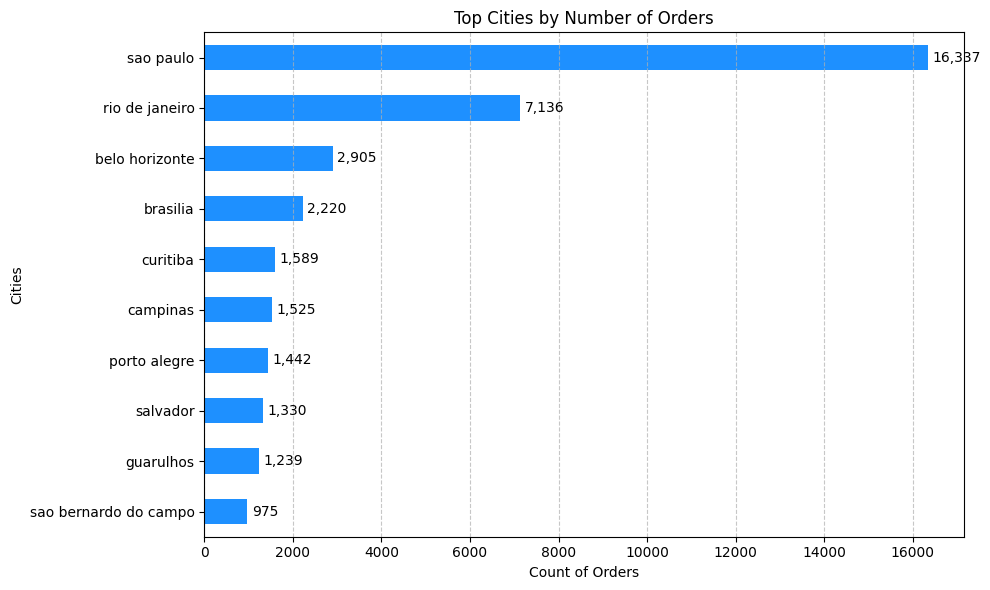

In [83]:
# Group by city and count orders
city_order_counts = new_master_dataset.groupby('city')['order_id'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
city_order_counts.plot(kind='barh', color='dodgerblue')
plt.xlabel('Count of Orders')
plt.ylabel('Cities')
plt.title('Top Cities by Number of Orders')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, value in enumerate(city_order_counts):
    plt.text(value + 100, i, f'{value:,}', va='center')

plt.tight_layout()
plt.show()



<h5>Most of our customers are from Sao Paulo, followed by Rio De Janeiro and Belo Horizonte. <h5>

#### Count of orders over time (Q3 2016 to Q3 2018)

In [84]:
new_master_dataset.dtypes

order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_delivered_customer_date            object
customer_unique_id                       object
zip_code                                  int64
city                                     object
state                                    object
product_id                               object
seller_id                                object
price                                   float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
review_score                            float64
product_category_name_english            object
order_count                               int64
is_repeat_buyer                           int64
recency_days                              int64
purchase_month                            int32
purchase_dayofweek                      

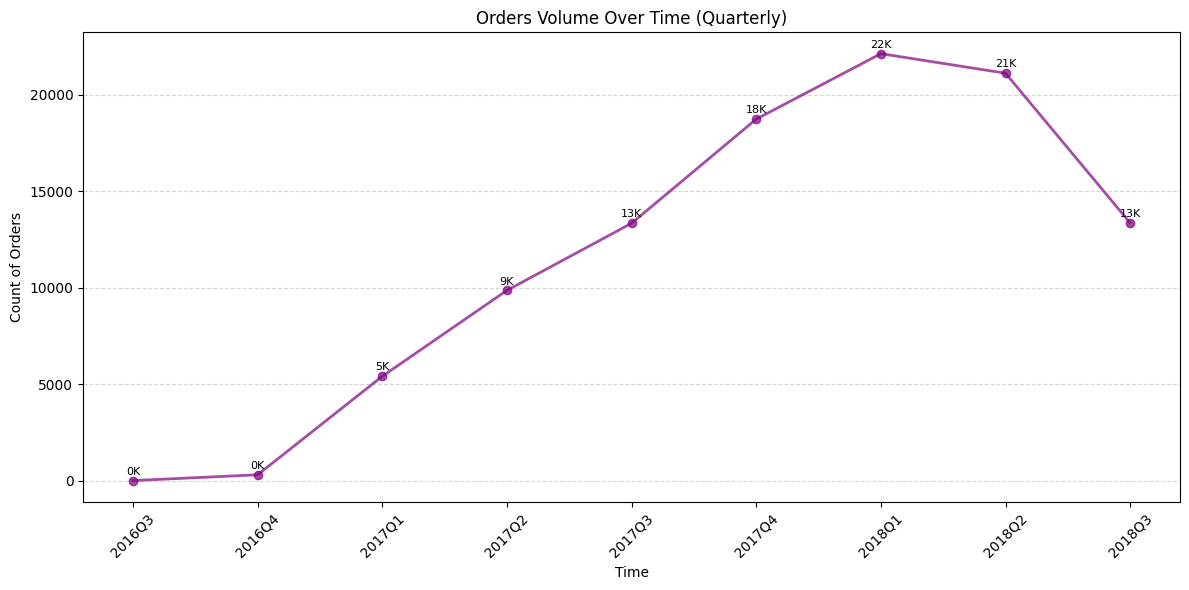

In [85]:
# Convert purchase timestamp to datetime
new_master_dataset['order_purchase_timestamp'] = pd.to_datetime(new_master_dataset['order_purchase_timestamp'])

new_master_dataset['quarter'] = new_master_dataset['order_purchase_timestamp'].dt.to_period('Q')

orders_per_quarter = new_master_dataset.groupby('quarter')['order_id'].count().reset_index()
orders_per_quarter['quarter'] = orders_per_quarter['quarter'].astype(str)

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(orders_per_quarter['quarter'], orders_per_quarter['order_id'], color='purple', linewidth=2, marker='o', alpha=0.7)

# Add labels on top of points
for i, val in enumerate(orders_per_quarter['order_id']):
    plt.text(i, val + 300, f'{val//1000}K', ha='center', fontsize=8)

# Customize plot
plt.xticks(rotation=45)
plt.ylabel('Count of Orders')
plt.xlabel('Time')
plt.title('Orders Volume Over Time (Quarterly)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h5>In this line graph, we can see that our orders peaked at around the end of 2017 and start of 2018. This could be due to people getting Christmas Gifts or New Year gifts for their loved ones. During these seasons there also tend to be Major promotions, hence explaining the peak of orders during this period of time. Anomaly, during the 4th quarter of 2016, the count of orders only increased by a little, which could possibly suggest that the company's business may have just took off around the 3rd quarter of 2016, as during that time there was close to no orders. <h5>

#### Top product categories by Revenue

In [86]:
top_categories_by_revenue = (
    new_master_dataset.groupby("product_category_name_english")["payment_value"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

print(top_categories_by_revenue)


  product_category_name_english  payment_value
0                 health_beauty     1464113.85
1                bed_bath_table     1443274.63
2                 watches_gifts     1309825.46
3                sports_leisure     1165053.99
4         computers_accessories     1124477.08
5               furniture_decor     1004405.23
6                    housewares      803342.52
7                    cool_stuff      708244.33
8                          auto      700392.16
9                  garden_tools      604834.59


####

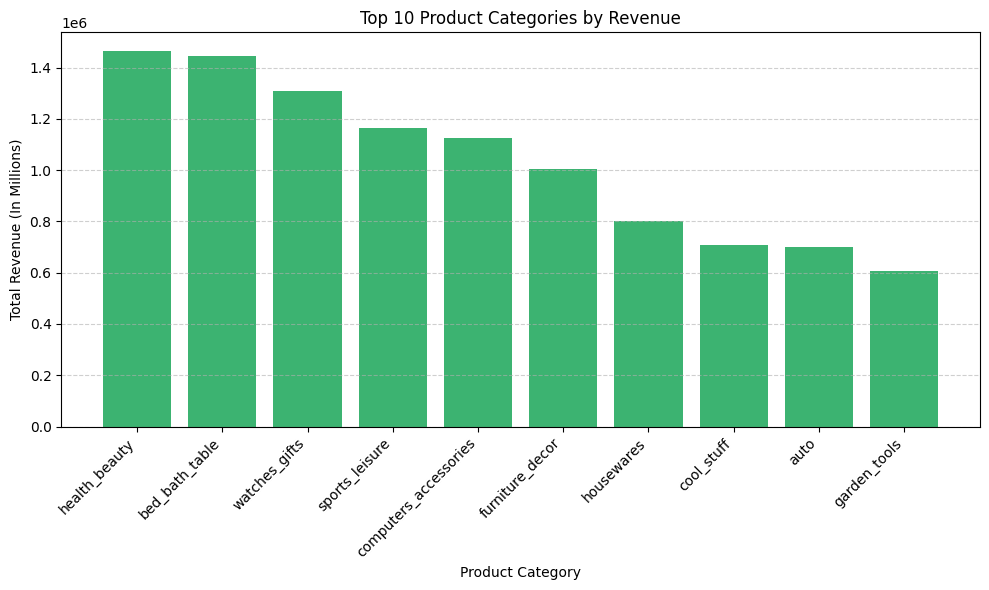

In [87]:
plt.figure(figsize=(10, 6))
plt.bar(top_categories_by_revenue['product_category_name_english'].head(10),
        top_categories_by_revenue['payment_value'].head(10),
        color = 'mediumseagreen')

plt.title('Top 10 Product Categories by Revenue')
plt.ylabel('Total Revenue (In Millions)')
plt.xlabel('Product Category')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<h5> These are our top 10 categories with the highest generating revenue. From this, we can conclude that customers of Olist are purchasing health, lifestyle and home-related items more. <h5>

### Customer Satisfaction

In [88]:
mode_value = new_master_dataset['review_score'].mode()[0]
# Replacing previously filled in null values "NULL" for the mode of all the reviews
new_master_dataset['review_score'] = new_master_dataset['review_score'].replace("NULL", mode_value)

In [89]:
# Checking of unique values in review score column
print(new_master_dataset["review_score"].unique())

[ 4.  5.  1. nan  2.  3.]


In [90]:
print('Total number of reviews are:', len(new_master_dataset['review_score']))

average_score = new_master_dataset["review_score"].mean()
print('Average review score:', round(average_score, 2))

Total number of reviews are: 104295
Average review score: 4.12


#### Count of reviews based on the review scores

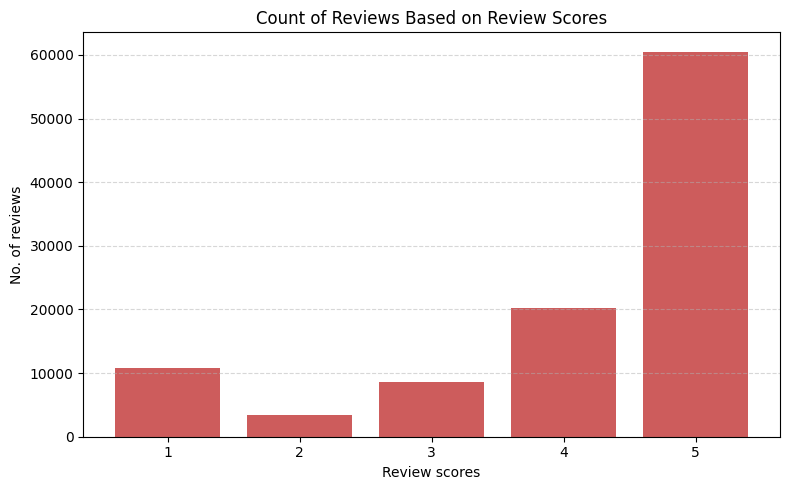

In [91]:
review_counts = new_master_dataset["review_score"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(review_counts.index, review_counts.values, color="indianred")
plt.title("Count of Reviews Based on Review Scores")
plt.xlabel("Review scores")
plt.ylabel("No. of reviews")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(review_counts.index)
plt.tight_layout()
plt.show()


<h5> Most of our customers are satisfied with our service, as we can see that about ~60% of the reviews are 5 stars, while around 13% of them are 1-2 stars. <h5>

#### Top categories with the highest reviews

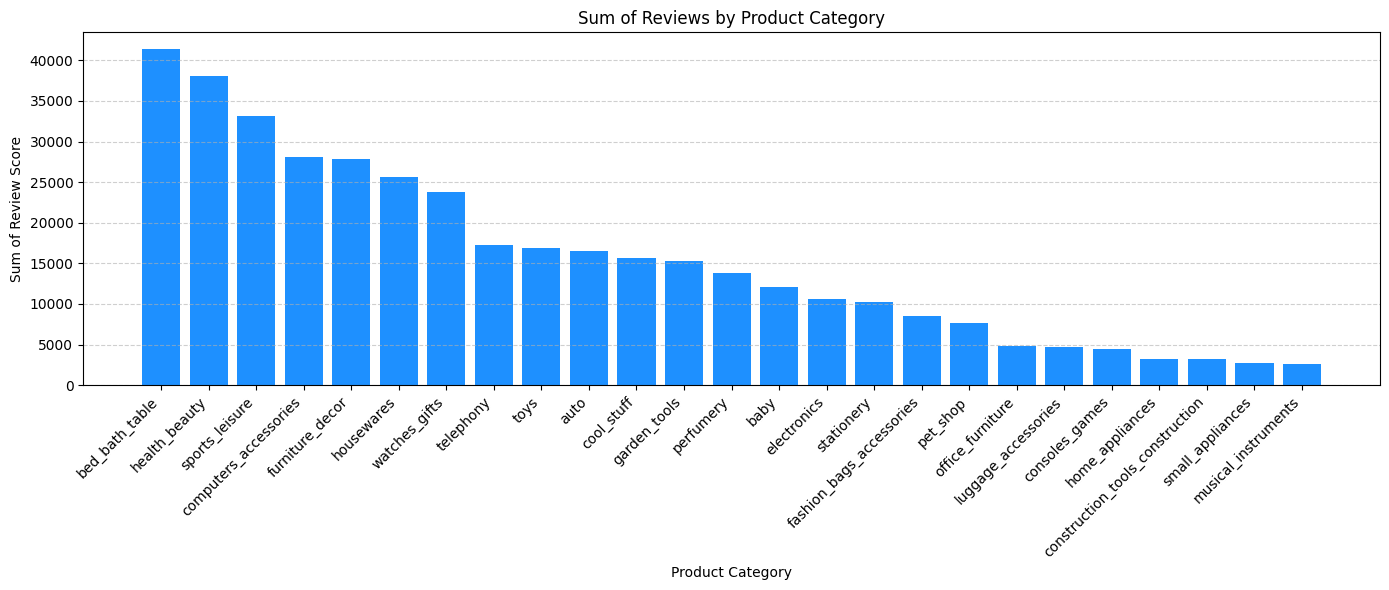

In [92]:
review_sum = (
    new_master_dataset.groupby("product_category_name_english")["review_score"]
    .sum()
    .sort_values(ascending=False)
    .head(25)
    .reset_index()
)

plt.figure(figsize=(14, 6))
plt.bar(review_sum["product_category_name_english"], review_sum["review_score"], color="dodgerblue")
plt.title("Sum of Reviews by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Sum of Review Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


<h4> Our top 10 categories with the highest amount of reviews are: <br>
    1. bed_bath_table - roughly about 40% of our total reviews<br>
    2. health_beauty - abit lesser than 40% of our reviews<br>
    3. sports_leisure <br>
    4. computers_accessories <br>
    5. furnitiure_decor <br>
    6. housewares <br>
    7. watches_gifts <br>
    8. telephony <br>
    9. toys <br>
    10. auto <h4>

#### Top categories with the highest amount of 5 star reviews

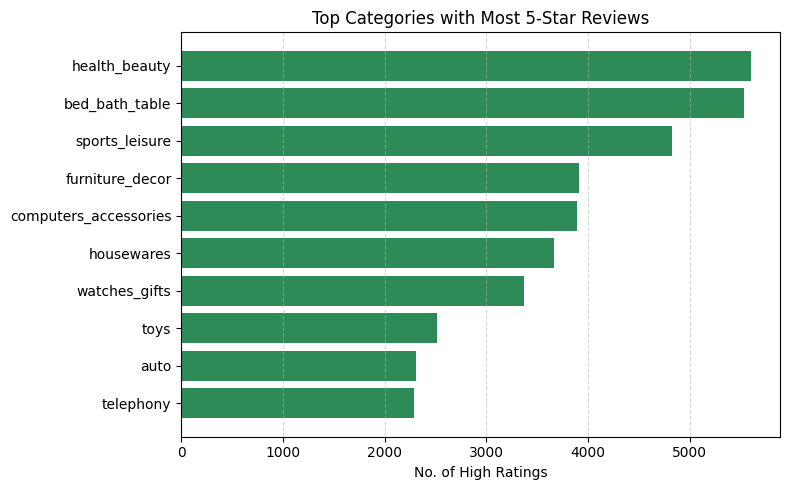

In [93]:
high_reviews = new_master_dataset[new_master_dataset["review_score"] == 5]

high_review_counts = (
    high_reviews["product_category_name_english"]
    .value_counts()
    .head(10)
)

plt.figure(figsize=(8, 5))
plt.barh(high_review_counts.index[::-1], high_review_counts.values[::-1], color="seagreen")
plt.title("Top Categories with Most 5-Star Reviews")
plt.xlabel("No. of High Ratings")
plt.tight_layout()
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()


#### Top categories with the highest amount of Low star reviews (1 & 2 stars)

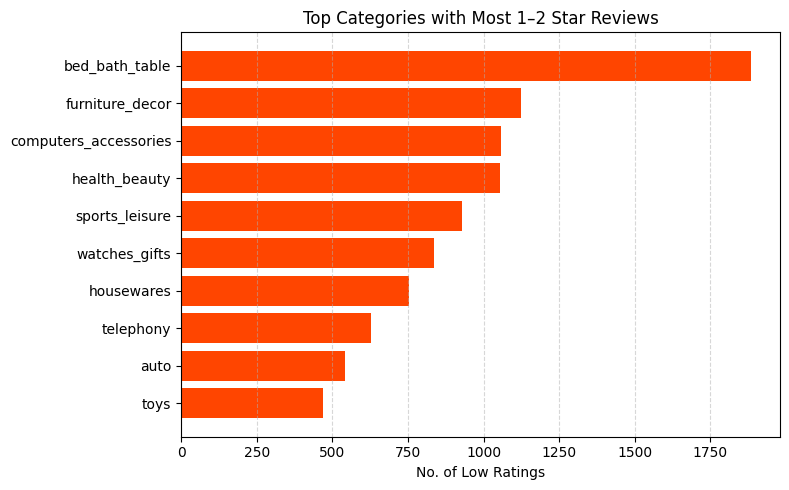

In [94]:
low_reviews = new_master_dataset[new_master_dataset["review_score"].isin([1, 2])]

low_review_counts = (
    low_reviews["product_category_name_english"]
    .value_counts()
    .head(10)
)

plt.figure(figsize=(8, 5))
plt.barh(low_review_counts.index[::-1], low_review_counts.values[::-1], color="orangered")
plt.title("Top Categories with Most 1–2 Star Reviews")
plt.xlabel("No. of Low Ratings")
plt.tight_layout()
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()


<h5> This shows that most of the reviews of the category bed_bath_table are well rated, as well as low rated. <h5>

### Operational Analysis (Delivery Date, Orders By status)

#### Delivery days taken for product to reach customers 

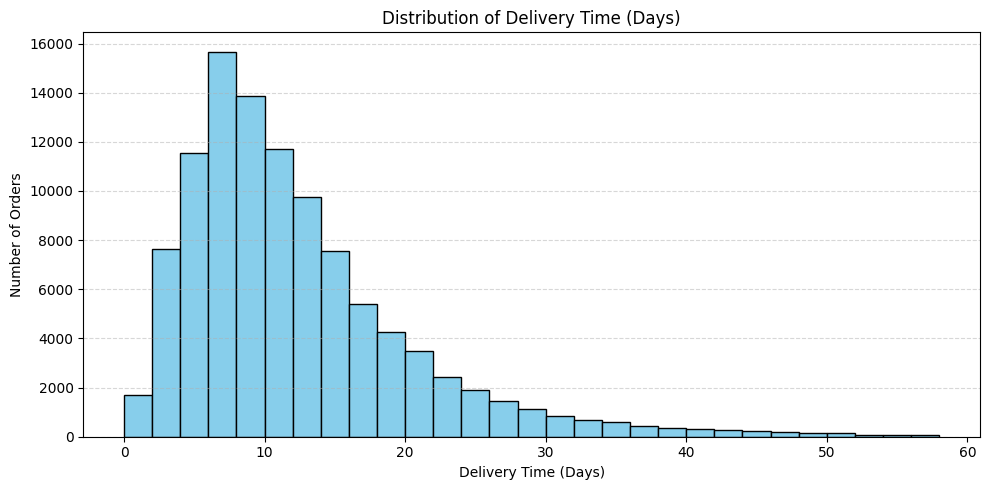

In [95]:
master_dataset["order_purchase_timestamp"] = pd.to_datetime(master_dataset["order_purchase_timestamp"])
master_dataset["order_delivered_customer_date"] = pd.to_datetime(master_dataset["order_delivered_customer_date"])

master_dataset["delivery_time_days"] = (master_dataset["order_delivered_customer_date"] - master_dataset["order_purchase_timestamp"]).dt.days

valid_delivery = master_dataset["delivery_time_days"].dropna()
valid_delivery = valid_delivery[valid_delivery >= 0]

plt.figure(figsize=(10, 5))
plt.hist(valid_delivery, bins=range(0, 60, 2), color="skyblue", edgecolor="black")
plt.title("Distribution of Delivery Time (Days)")
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Number of Orders")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

<h5> Shows that most of the deliveries are delivered under 10 days, while some being 10 to 20 days, which is expected especially with overseas shipment tends to possibly take longer than usual <h5>

### Repeated Buyers Visualization

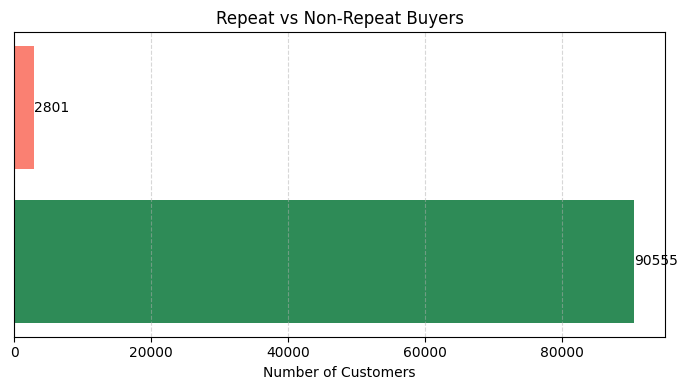

In [96]:
repeat_summary = repeat_summary = (
    new_master_dataset.groupby("customer_unique_id")["is_repeat_buyer"]
    .first()
    .value_counts()
    .rename(index={True: "Repeat Buyer", False: "One-time Buyer"})
)

plt.figure(figsize=(8, 4))
bars = plt.barh(repeat_summary.index, repeat_summary.values, color=["seagreen", "salmon"])
plt.title("Repeat vs Non-Repeat Buyers")
plt.xlabel("Number of Customers")
plt.tight_layout()

plt.gca().axes.get_yaxis().set_visible(False)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 50, bar.get_y() + bar.get_height()/2, str(int(width)), va='center')

plt.grid(axis='x', linestyle="--", alpha=0.5)
plt.show()

<h5> We only consist of 3% of repeat buyers, which is honestly quite bad compared to single-time buyers. <h5>

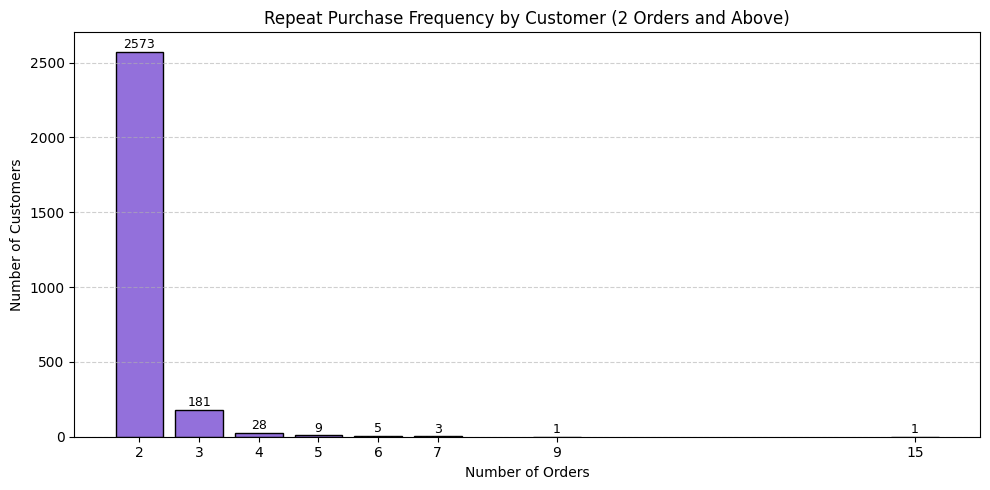

In [97]:
customer_order_counts = new_master_dataset.groupby("customer_unique_id")["order_id"].nunique()
repeat_counts = customer_order_counts[customer_order_counts >= 2].value_counts().sort_index()

plt.figure(figsize=(10, 5))
bars = plt.bar(repeat_counts.index, repeat_counts.values, color="mediumpurple", edgecolor="black")
plt.title("Repeat Purchase Frequency by Customer (2 Orders and Above)")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.xticks(repeat_counts.index)
plt.grid(axis='y', linestyle="--", alpha=0.6)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, str(int(height)),
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


<h5> Most of our repeat buyers brought twice from us, with a little being around thrice, and then 4,5,6,7 and 9. We then have an outlier who have brought 15 times from us..quite the loyal customer I must say. <h5>

#### Top categories with the highest number of repeated buys/repeated buyers

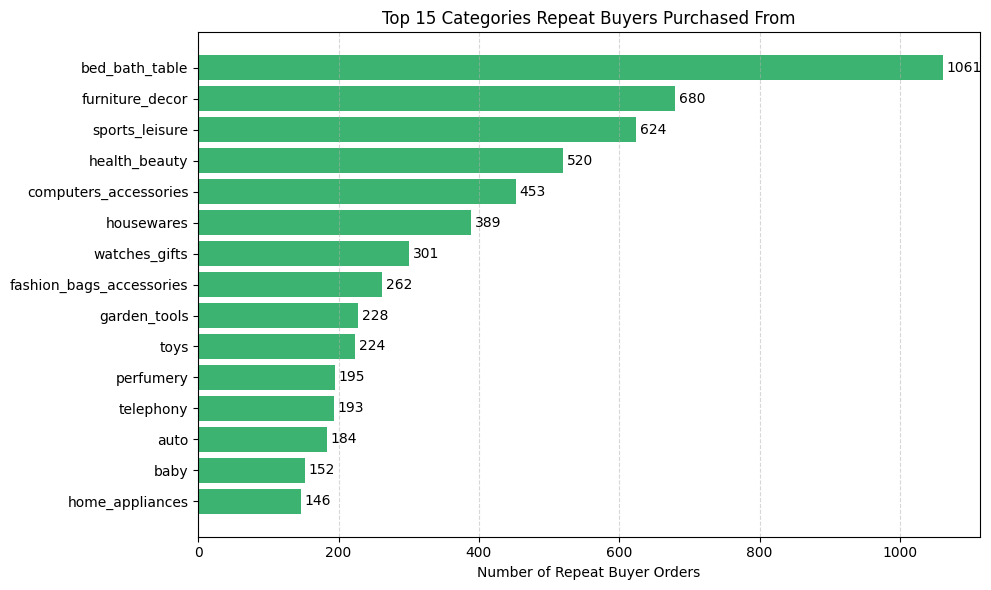

In [98]:
repeat_buyers_df = new_master_dataset[new_master_dataset["is_repeat_buyer"] == True]
repeat_top_counts = repeat_buyers_df["product_category_name_english"].value_counts().head(15)

plt.figure(figsize=(10, 6))
bars = plt.barh(repeat_top_counts.index[::-1], repeat_top_counts.values[::-1], color="mediumseagreen")
plt.title("Top 15 Categories Repeat Buyers Purchased From")
plt.xlabel("Number of Repeat Buyer Orders")
plt.tight_layout()

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, str(width), va='center')

plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()


<h5> This shows what our repeat customers tend to buy. From the top 10 categories, we can tell that they like to spend their money on home and lifestyle products. <h5>

#### Average Delivery timing days based by Review Score

In [99]:
new_master_dataset["order_purchase_timestamp"] = pd.to_datetime(new_master_dataset["order_purchase_timestamp"])
new_master_dataset["order_delivered_customer_date"] = pd.to_datetime(new_master_dataset["order_delivered_customer_date"])
new_master_dataset["delivery_time_days"] = (new_master_dataset["order_delivered_customer_date"] - new_master_dataset["order_purchase_timestamp"]).dt.days

In [100]:
new_master_dataset_filtered = new_master_dataset.dropna(subset=["delivery_time_days", "review_score"])
new_master_dataset_filtered = new_master_dataset_filtered[new_master_dataset_filtered["delivery_time_days"] >= 0]

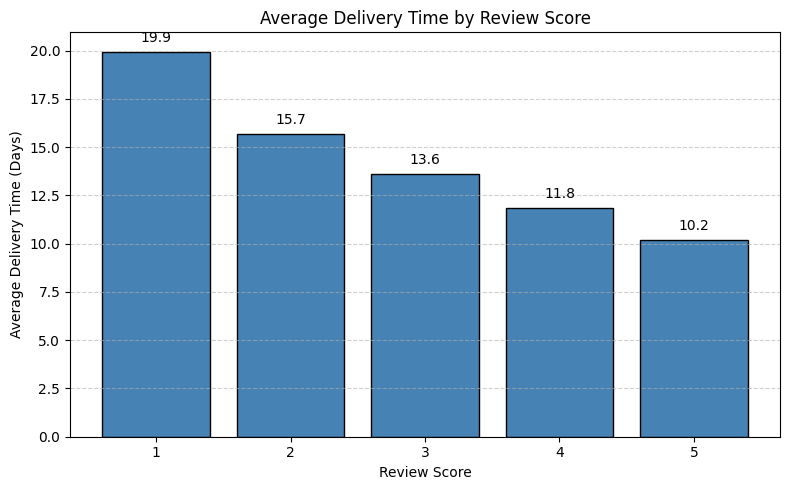

In [101]:
import matplotlib.pyplot as plt

avg_delivery_by_score = new_master_dataset_filtered.groupby("review_score")["delivery_time_days"].mean()

plt.figure(figsize=(8, 5))
bars = plt.bar(avg_delivery_by_score.index, avg_delivery_by_score.values, color="steelblue", edgecolor="black")
plt.title("Average Delivery Time by Review Score")
plt.xlabel("Review Score")
plt.ylabel("Average Delivery Time (Days)")
plt.grid(axis="y", linestyle="--", alpha=0.6)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.1f}", ha='center')

plt.tight_layout()
plt.show()


<h5> Customers are more likely to give 5-star reviews when their orders are delivered quickly. This suggests that shorter delivery times play a significant role in driving customer satisfaction and encouraging repeat purchases. <h5>

#### Average review score of Repeat vs Non-repeat Buyers

#### No./Percentage of 1-2 star ratings by repeat buyers, non-repeat buyers

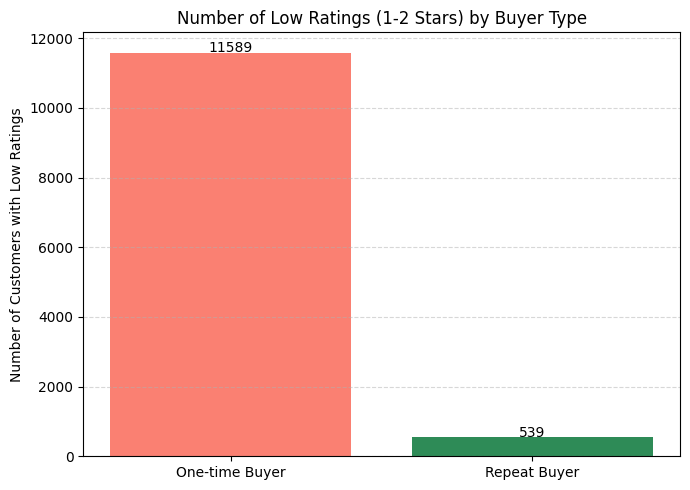

In [102]:
subset_repeat_review = new_master_dataset.dropna(subset=["is_repeat_buyer", "review_score"])
new_master_dataset["is_repeat_buyer"] = new_master_dataset["is_repeat_buyer"].astype(bool)

low_rated = new_master_dataset[new_master_dataset["review_score"] <= 2]

low_review_counts = low_rated.groupby("is_repeat_buyer")["customer_unique_id"].nunique()
low_review_counts.index = ["One-time Buyer", "Repeat Buyer"]

plt.figure(figsize=(7, 5))
bars = plt.bar(low_review_counts.index, low_review_counts.values, color=["salmon", "seagreen"])
plt.title("Number of Low Ratings (1-2 Stars) by Buyer Type")
plt.ylabel("Number of Customers with Low Ratings")
plt.grid(axis="y", linestyle="--", alpha=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(int(height)), ha='center')

plt.tight_layout()
plt.show()


In [103]:
repeat_total = subset_repeat_review[subset_repeat_review["is_repeat_buyer"] == True]["customer_unique_id"].nunique()
onetime_total = subset_repeat_review[subset_repeat_review["is_repeat_buyer"] == False]["customer_unique_id"].nunique()

repeat_5stars = subset_repeat_review[(subset_repeat_review["is_repeat_buyer"] == True) & (subset_repeat_review["review_score"] <= 2)]["customer_unique_id"].nunique()
onetime_5stars = subset_repeat_review[(subset_repeat_review["is_repeat_buyer"] == False) & (subset_repeat_review["review_score"] <= 2)]["customer_unique_id"].nunique()

repeat_5star_rate = (repeat_5stars / repeat_total) * 100
onetime_5star_rate = (onetime_5stars / onetime_total) * 100

print(f" Repeat Buyers: {repeat_5star_rate:.2f}% gave 1-2 star reviews")
print(f" One-time Buyers: {onetime_5star_rate:.2f}% gave 1-2 star reviews")

 Repeat Buyers: 19.31% gave 1-2 star reviews
 One-time Buyers: 12.88% gave 1-2 star reviews


<h5>Although more low ratings come from one-time buyers in total, a higher proportion of repeat buyers give low ratings — suggesting that maintaining consistent satisfaction over time is crucial. Repeat customers may be more vocal and critical if their expectations are not met <h5>

#### No./Percentage of 5 star ratings by repeat buyers, non-repeat buyers

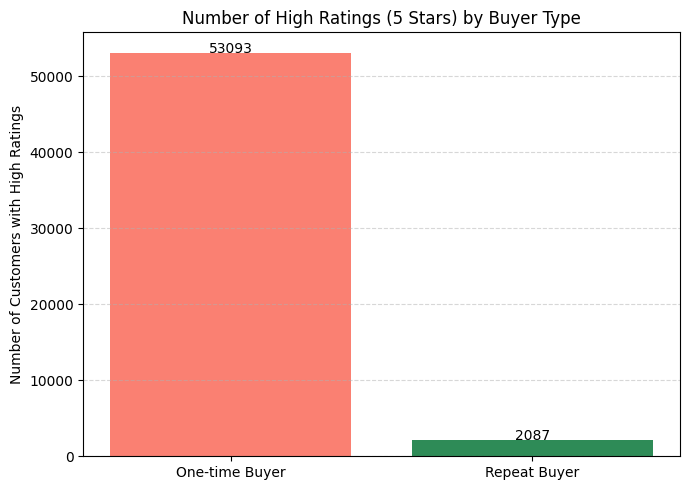

In [104]:
subset_repeat_review = new_master_dataset.dropna(subset=["is_repeat_buyer", "review_score"])
new_master_dataset["is_repeat_buyer"] = new_master_dataset["is_repeat_buyer"].astype(bool)

high_rated = new_master_dataset[new_master_dataset["review_score"] >= 5]

high_review_counts = high_rated.groupby("is_repeat_buyer")["customer_unique_id"].nunique()
high_review_counts.index = ["One-time Buyer", "Repeat Buyer"]

plt.figure(figsize=(7, 5))
bars = plt.bar(high_review_counts.index, high_review_counts.values, color=["salmon", "seagreen"])
plt.title("Number of High Ratings (5 Stars) by Buyer Type")
plt.ylabel("Number of Customers with High Ratings")
plt.grid(axis="y", linestyle="--", alpha=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(int(height)), ha='center')

plt.tight_layout()
plt.show()

In [105]:
repeat_total = subset_repeat_review[subset_repeat_review["is_repeat_buyer"] == True]["customer_unique_id"].nunique()
onetime_total = subset_repeat_review[subset_repeat_review["is_repeat_buyer"] == False]["customer_unique_id"].nunique()

repeat_5stars = subset_repeat_review[(subset_repeat_review["is_repeat_buyer"] == True) & (subset_repeat_review["review_score"] == 5)]["customer_unique_id"].nunique()
onetime_5stars = subset_repeat_review[(subset_repeat_review["is_repeat_buyer"] == False) & (subset_repeat_review["review_score"] == 5)]["customer_unique_id"].nunique()

repeat_5star_rate = (repeat_5stars / repeat_total) * 100
onetime_5star_rate = (onetime_5stars / onetime_total) * 100

print(f" Repeat Buyers: {repeat_5star_rate:.2f}% gave 5-star reviews")
print(f" One-time Buyers: {onetime_5star_rate:.2f}% gave 5-star reviews")

 Repeat Buyers: 74.75% gave 5-star reviews
 One-time Buyers: 59.02% gave 5-star reviews


<h5> Shows that majority of our repeat buyers tend to give 5 stars, hence correlating that delivery time plays a significant role in driving repeat purchases. <h5>

#### Price vs Actual Paid 

/tmp/ipykernel_435/3102711980.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_group = new_master_dataset.groupby("price_range")["is_repeat_buyer"]


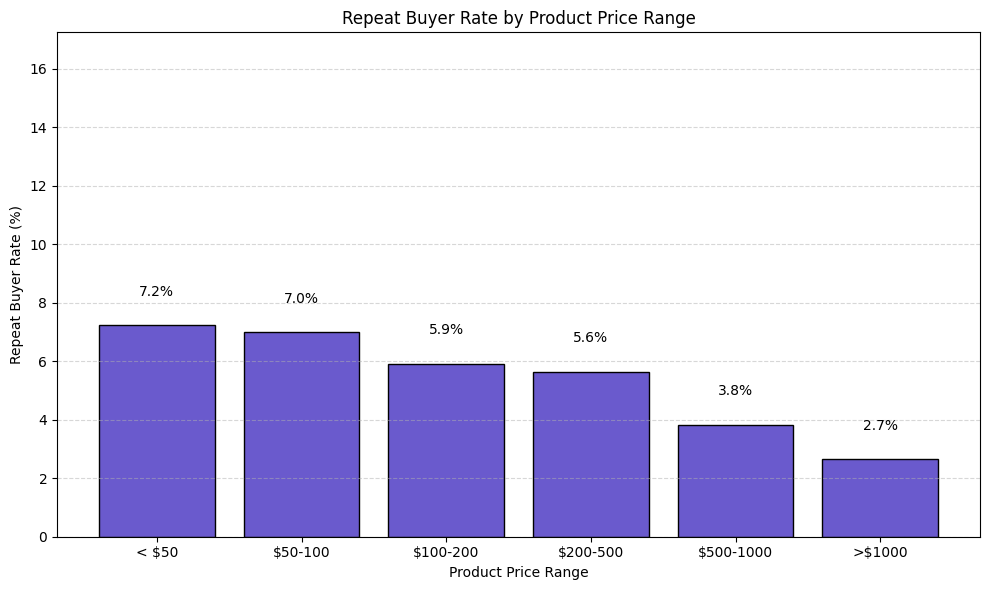

In [106]:
# Define price bins and labels
bins = [0, 50, 100, 200, 500, 1000, float('inf')]
labels = ['< $50', '$50-100', '$100-200', '$200-500', '$500-1000', '>$1000']
new_master_dataset["price_range"] = pd.cut(new_master_dataset["price"], bins=bins, labels=labels)

price_group = new_master_dataset.groupby("price_range")["is_repeat_buyer"]
repeat_rate = price_group.mean() * 100
total_orders = price_group.count()

plt.figure(figsize=(10, 6))
bars = plt.bar(repeat_rate.index, repeat_rate.values, color="slateblue", edgecolor="black")
plt.title("Repeat Buyer Rate by Product Price Range")
plt.ylabel("Repeat Buyer Rate (%)")
plt.xlabel("Product Price Range")
plt.ylim(0, repeat_rate.max() + 10)
plt.grid(axis="y", linestyle="--", alpha=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%", ha='center')

plt.tight_layout()
plt.show()


<h5> Repeat buyers tend to buy less of expensive products, while it is the complete opposite for products valued under $50. As seen in the trend of the bar chart. <h5>

#### Repeat Buyer vs Payment Type

In [107]:
new_master_dataset['payment_type'].unique

<bound method Series.unique of 0         credit_card
1             voucher
2             voucher
3              boleto
4         credit_card
             ...     
104290    credit_card
104291    credit_card
104292    credit_card
104293    credit_card
104294     debit_card
Name: payment_type, Length: 104295, dtype: object>

In [108]:
new_master_dataset["payment_type"].value_counts()
new_master_dataset["payment_type"] = new_master_dataset["payment_type"].replace("unknown", "Other")

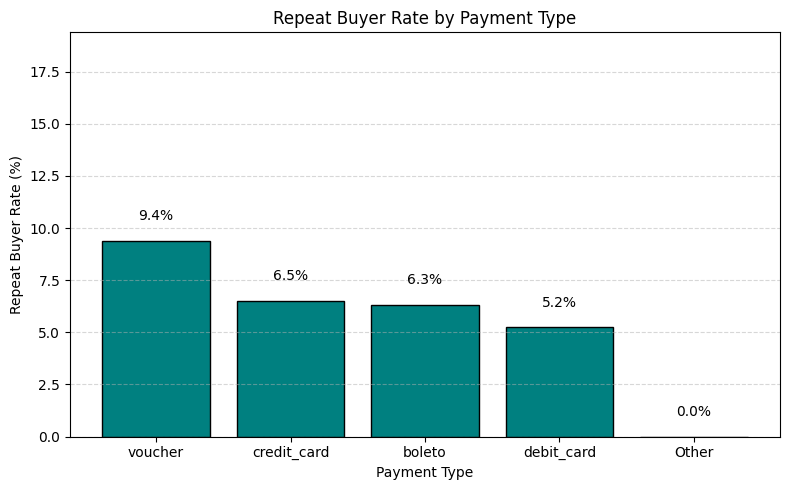

In [109]:
# Group by payment type and calculate repeat buyer rate
payment_group = new_master_dataset.groupby("payment_type")["is_repeat_buyer"]
repeat_rate_by_payment = payment_group.mean().sort_values(ascending=False) * 100

plt.figure(figsize=(8, 5))
bars = plt.bar(repeat_rate_by_payment.index, repeat_rate_by_payment.values, color="teal", edgecolor="black")
plt.title("Repeat Buyer Rate by Payment Type")
plt.ylabel("Repeat Buyer Rate (%)")
plt.xlabel("Payment Type")
plt.ylim(0, repeat_rate_by_payment.max() + 10)
plt.grid(axis="y", linestyle="--", alpha=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{height:.1f}%", ha='center')

plt.tight_layout()
plt.show()

<h5> Customers who pay using vouchers are more likely to return, indicating that discount-driven incentives can be an effective strategy for encouraging repeat purchases. Businesses may benefit from expanding voucher-based promotions or improving the user experience with other payment methods. <h5>

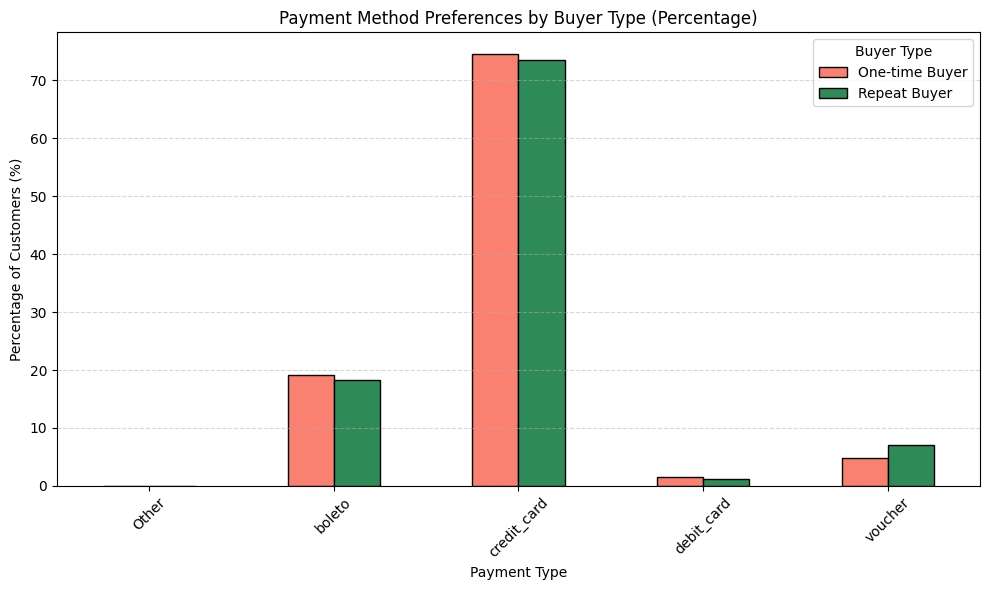

In [110]:
payment_counts = new_master_dataset.groupby(["is_repeat_buyer", "payment_type"])["customer_unique_id"].count().unstack().fillna(0)

# Convert counts to percentage within each buyer type
payment_percentage = payment_counts.div(payment_counts.sum(axis=1), axis=0) * 100
payment_percentage.index = ["One-time Buyer", "Repeat Buyer"]

payment_percentage.T.plot(kind="bar", figsize=(10, 6), color=["salmon", "seagreen"], edgecolor="black")
plt.title("Payment Method Preferences by Buyer Type (Percentage)")
plt.xlabel("Payment Type")
plt.ylabel("Percentage of Customers (%)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.legend(title="Buyer Type")

plt.show()


<h5> While most customers, both one-time and repeat—prefer credit cards, voucher usage stands out among repeat buyers, reinforcing its role in fostering customer loyalty. This means that vouchers could potentially help convert one-time buyers into repeat customers. <h5>

### Insights summary

<h5> Hence, in order for Olist to bring in more repeat purchases from their customers, I would suggest that they be more consistent and have shorter delivery times. I also suggest that Olist should give vouchers to customers to foster customer loyalty, bringing in more repeated purchases. If Olist wants their customers repeatedly purchase expensive products, I would suggest that they can bring in benefits such as extended warranties, complementary add-ons and accessories. Such benefits could entice customers to buy from them again. <h5>